## From the given dataset, get the required information asked for.

#### Importing different libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data from the d-drive.

In [12]:
credit_card = pd.read_excel('d:/Data/Credit_card_data.xlsx')
repay = pd.read_excel('d:/Data/Repayment.xlsx')
spend = pd.read_excel('d:/Data/spend.xlsx')
customer = pd.read_excel('d:/Data/Customer_Acqusition.xlsx')

#### df.columns is used just to get the specifically the names of the columns in the given table.

In [9]:
spend.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [10]:
repay.columns

Index(['SL No:', 'Customer', 'Month', 'Amount'], dtype='object')

In [11]:
credit_card.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [13]:
customer.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

#### Q: In case the age is 18, replace it with the mean of age values.

In [24]:
m_age = customer['Age'].mean()
print('The mean age is', m_age)

The mean age is 46.49


In [25]:
customer.loc[customer['Age'] < 18] = customer['Age'].mean()

In [28]:
new_mean = customer['Age'].mean()

#### All the customers whose age was less than 18 has been replaced.

#### Q: In case spend amount is more than the limit, replace it with 50% of the customer's list.

In [31]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [32]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13


In [185]:
customer_spend = customer.merge(spend, left_on = 'Customer', right_on = 'Customer', how = 'inner' )

In [34]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13


In [37]:
customer_spend[customer_spend['Amount'] > customer_spend['Limit']]
customer_spend.loc[customer_spend['Amount'] > customer_spend['Limit'], 'Amount'] = (50 * customer_spend['Limit']).div(100)

In [44]:
customer_spend[customer_spend['Amount'] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


#### No such customer is there.

#### Q: In case the repayment amount is more than the limit, repalce the repayment with the limit.

In [47]:
customer.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [48]:
repay.head(1)

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75


In [49]:
customer_repay = customer.merge(repay, left_on = 'Customer', right_on = 'Customer', how = 'inner')

In [50]:
customer_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02


In [52]:
customer_repay[customer_repay['Amount'] > customer_repay['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
18,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104.0,2004-01-03,185955.07
19,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118.0,2005-02-28,412783.34
20,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132.0,2004-04-06,148038.67
21,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146.0,2004-11-23,179144.68
23,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,174.0,2005-08-03,381635.66
...,...,...,...,...,...,...,...,...,...,...,...
1417,87.0,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89.0,2006-03-30,462283.02
1425,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,310992.30
1426,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,121874.90
1427,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,337815.57


In [53]:
customer_repay.loc[customer_repay['Amount'] > customer_repay['Limit'],'Amount'] = customer_repay['Limit']

In [56]:
customer_repay[customer_repay['Amount'] > customer_repay['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount


#### No such customer is there..

#### Q: How many distinct customers exist.

In [64]:
dist_customers = customer['Customer'].nunique()
print('There are a total of ', dist_customers , 'customers')

There are a total of  95 customers


#### Q: How many distinct segment exist.

In [65]:
customer['Segment'].value_counts()

Govt             27
Normal Salary    22
Self Employed    20
Salaried_MNC     13
Salaried_Pvt     12
46.49             6
Name: Segment, dtype: int64

#### There are a total of 5 categories.

#### Q: What is the average monthly spend by customers?

In [71]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [74]:
spend['Monthly'] = spend['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
spend['Yearly'] = spend['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [75]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004


In [94]:
customer_spend_group = round(spend.groupby(['Yearly','Monthly'])[['Amount']].mean(),2)
customer_spend_group

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

#### Q: What is the average monthly repayment of customers?

In [87]:
repay.head(2)

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75
1,2.0,A1,2004-01-03,245899.02


In [89]:
repay['Monthly'] = repay['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
repay['Yearly'] = repay['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [90]:
repay.head(2)

,SL No:,Customer,Month,Amount,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,January,2004
1,2.0,A1,2004-01-03,245899.02,January,2004


In [93]:
customer_repay_group = round(repay.groupby(['Yearly', 'Monthly'])[['Amount']].mean(),2)
customer_repay_group

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

In [95]:
customer_repay.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75


In [96]:
spend.head(1)

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004


#### Q: If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Monthly Profit = Monthly Repayment - Monthly spend).

In [97]:
customer_repay_spend = customer_repay.merge(spend, left_on = 'Customer', right_on = 'Customer', how = 'inner')

In [99]:
customer_repay_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month_x,Amount_x,Sl No:,Month_y,Type,Amount_y,Monthly,Yearly
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,2,2004-01-03,PETRO,410556.13,January,2004


In [101]:
customer_repay_spend.rename(columns = {'Amount_x':'Spend_Amount','Amount_y':'Repay_Amount'}, inplace = True)

In [102]:
customer_repay_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month_x,Spend_Amount,Sl No:,Month_y,Type,Repay_Amount,Monthly,Yearly
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,2,2004-01-03,PETRO,410556.13,January,2004


In [105]:
interest =customer_repay_spend.groupby(['Yearly', 'Monthly'])[['Spend_Amount','Repay_Amount']].sum()
interest

Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      9.526875e+07  1.486489e+08
       February   1.190423e+08  1.469321e+08
       January    1.184425e+09  1.820512e+09
       March      5.672043e+07  8.938031e+07
       May        7.263925e+07  7.845624e+07
       November   5.105995e+07  9.321587e+07
       September  6.290461e+07  1.113694e+08
2005   April      1.206006e+08  1.921722e+08
       August     9.998156e+07  1.557368e+08
       December   5.857031e+07  5.088172e+07
       February   7.180452e+08  8.870167e+08
       January    1.046981e+08  1.979342e+08
       July       4.496222e+07  8.007985e+07
       June       2.148882e+08  3.101402e+08
       May        5.842707e+08  8.308146e+08
       November   1.673925e+08  2.753311e+08
       October    4.636858e+07  6.218014e+07
       September  4.662630e+07  6.404540e+07
2006   April      3.413979e+08  5.141943e+08
       August     9.112033e+07  9.520109e+07
       December   4.487033e+07  7.085890e+07
       February   1.301662e+08  2.396904e+08
       January    5.141642e+07  9.837846e+07
       July       1.307165e+08  2.081915e+08
       June       6.453334e+07  6.642966e+07
       March      7.712935e+08  1.240535e+09
       May        2.016199e+08  2.967202e+08
       November   1.061002e+08  1.073077e+08
       October    7.310762e+07  7.874888e+07
       September  7.082368e+07  5.490720e+07

In [106]:
interest['Monthly_Profit'] = interest['Repay_Amount'] - interest['Spend_Amount']

In [107]:
interest['Interest_Received'] = (2.9 * interest['Monthly_Profit'])/100

In [108]:
interest.head(2)

Spend_Amount  Repay_Amount  Monthly_Profit  Interest_Received
Yearly Monthly                                                                
2004   April     9.526875e+07  1.486489e+08     53380114.52       1.548023e+06
       February  1.190423e+08  1.469321e+08     27889831.24       8.088051e+05

#### Q: What are the top 5 products.

In [117]:
customer.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3.0,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4.0,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5.0,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [118]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [116]:
repay.head(1)

,SL No:,Customer,Month,Amount,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,January,2004


In [119]:
spend['Type'].value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

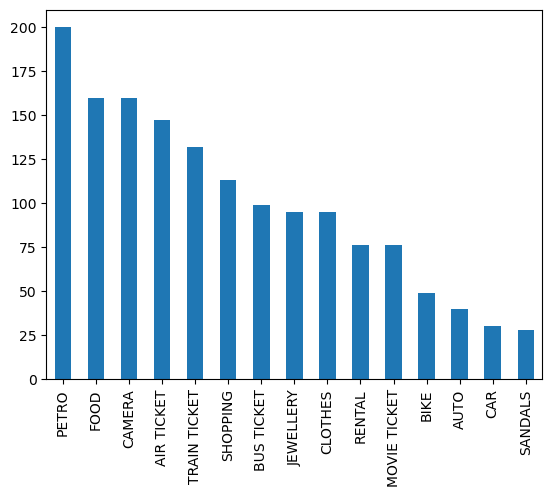

In [122]:
spend['Type'].value_counts().plot(kind = 'bar');

#### Q: Which city is having maximum spend?

In [124]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13


In [127]:
customer_spend.groupby('City')[['Amount']].sum().sort_values(by = 'Amount',ascending = False)

,Amount
City,
CALCUTTA,41108132.30
COCHIN,38624218.06
BANGALORE,31998057.56
BOMBAY,28593126.38
CHENNAI,22128635.65
TRIVANDRUM,15277490.39
PATNA,15260586.97
DELHI,10918286.54


#### Calcutta is having the maximum spend.

#### Q: Which age group is spending more money?

In [131]:
customer_spend['Age'].min()

19.0

In [132]:
customer_spend['Age'].max()

79.0

In [139]:
bins = [18,26,34,42,50,58,66,74,82]

customer_spend['Age_group'] = pd.cut(customer_spend['Age'], bins, labels = ["18-26","26-34","34-42","42-50","50-58","58-66",
                                                                            "66-74","74-82"])

In [140]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82


In [143]:
age_spend = customer_spend.groupby('Age_group')['Amount'].sum().sort_values(ascending = False)
age_spend

Age_group
34-42    38037826.50
42-50    37369839.32
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

#### Age group between 34-42

#### Q: Who are the top 10 customers in terms of repayment?

In [145]:
customer_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02


In [146]:
customer_repay.groupby('Customer')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A44,7744730.12
A39,7622483.30
A42,7615460.86


#### Q: Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [148]:
customer_spend.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,74-82


In [151]:
customer_spend['Year'] = customer_spend['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [153]:
customer_spend.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,74-82,2004


In [156]:
customer_spend.drop_duplicates(inplace = True)

In [158]:
customer_spend_pivot = pd.pivot_table(data = customer_spend, index = ['City','Year'], columns = 'Product', aggfunc = 'sum'
                                     ,values = 'Amount')

In [159]:
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   7460145.61  1112732.30  1291852.58
           2005   8706615.03   912284.97   830612.34
           2006   9582502.52   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   706804.44   508988.54
           2006   7917144.31   967129.51  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  2199994.82   814229.62
           2005  12110613.03  1278274.70   652269.38
           2006  10234260.11  2748735.38  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   200002.00
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   505862.12

<AxesSubplot:xlabel='City,Year'>

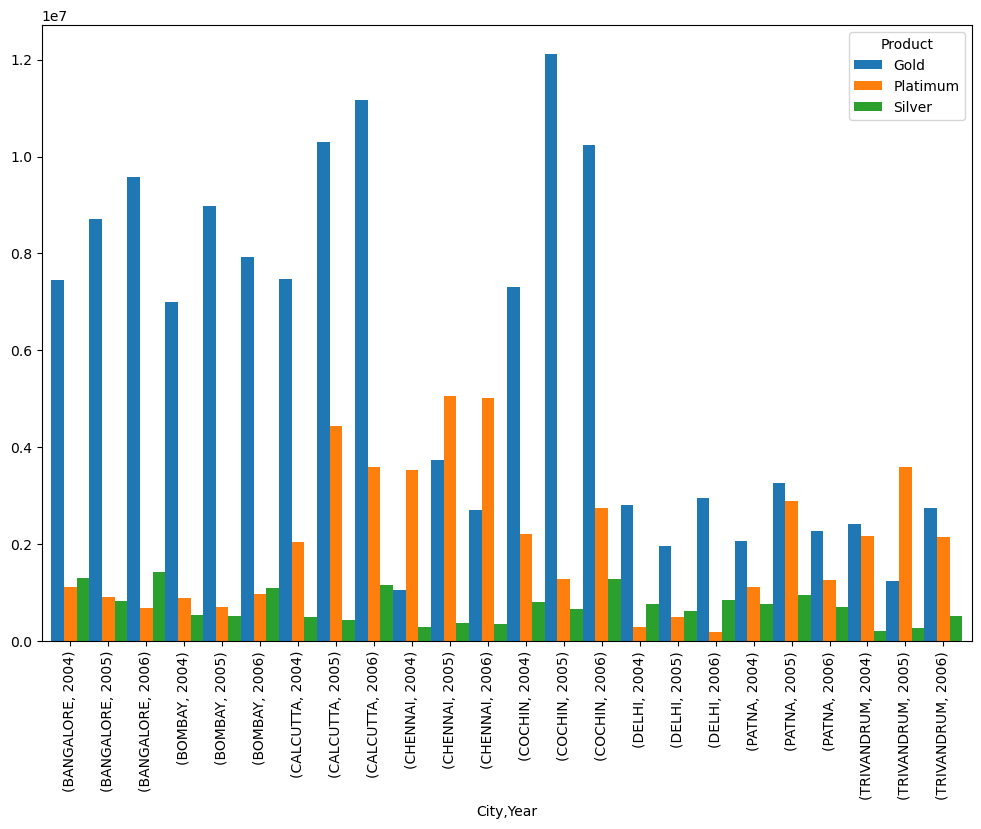

In [162]:
customer_spend_pivot.plot(kind = 'bar', figsize = (12,8), width = 1)
plt.ylabel('Amount Spend')
plt.title()

#### Q: Create graphs for Monthly comparison of Total Spends, city wise.

In [164]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005


In [165]:
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))

In [166]:
customer_spend.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year,Monthly
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,74-82,2004,January


In [167]:
month_city = pd.pivot_table(data = customer_spend, index = 'City', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')

In [168]:
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,3199801.25,505045.52,132283.01,4775578.95,7673155.76,1665885.02,960188.70,4924194.80,5197136.75,1692959.05,677316.67,594512.08
BOMBAY,1873785.01,1066744.75,140040.71,4271987.80,5948993.33,177726.32,1172594.97,5222850.00,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,2892768.29,2111348.93,909533.05,4602112.17,9808001.73,1246457.66,2495745.07,5008975.34,5611381.45,1989830.28,868551.89,1079512.20
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3694671.51,260484.50,400336.83,2342316.51,2813534.48,143387.40,285581.92,186063.70


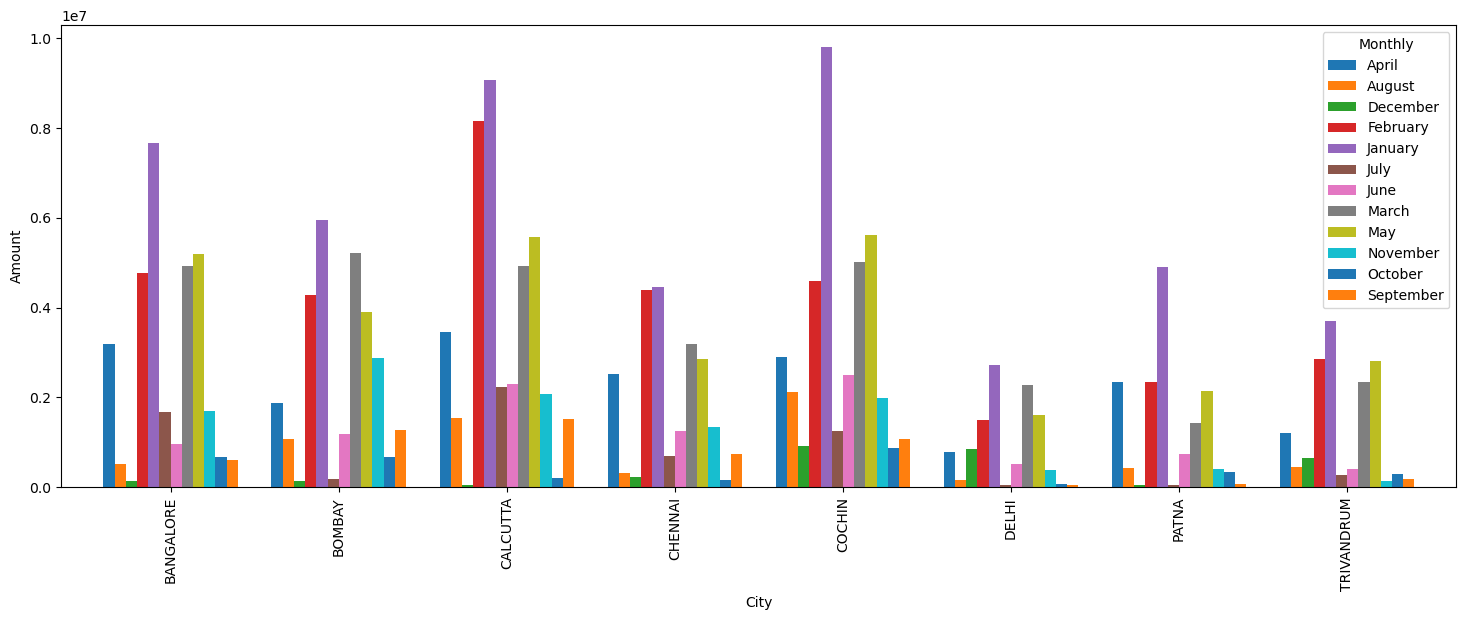

In [175]:
month_city.plot(kind = 'bar', figsize = (18,6), width = 0.8)
plt.ylabel('Amount');

#### Q: Create graphs for comparison of yearly spend on air tickets.

In [186]:
customer_spend.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Monthly,Yearly
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,January,2004


In [193]:
air_tickets = customer_spend.groupby(['Yearly','Type'])[['Amount']].sum().reset_index()
air_tickets.head(1)

,Yearly,Type,Amount
0,2004,AIR TICKET,7896200.46


In [194]:
filtered = air_tickets.loc[air_tickets['Type'] == 'AIR TICKET']

In [195]:
filtered

,Yearly,Type,Amount
0,2004,AIR TICKET,7896200.46
15,2005,AIR TICKET,13046258.53
30,2006,AIR TICKET,9704910.91


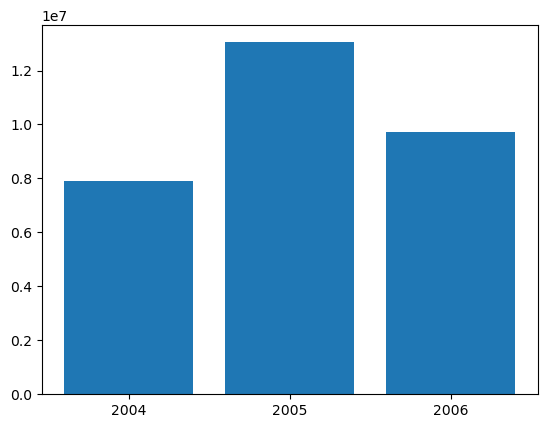

In [200]:
plt.bar(filtered['Yearly'], height = filtered['Amount']);

#### Q: Create graphs for comparison of monthly spend for each product(look for any seasonality that exists in terms of spend)

In [201]:
customer_spend.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Monthly,Yearly
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,January,2004


In [202]:
product_comp = pd.pivot_table(data = customer_spend, index = 'Product', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')

In [204]:
product_comp

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,11897511.09,4764013.99,2043056.73,22820263.74,31045190.75,4605083.70,6168365.44,18818264.21,20362191.38,8635623.44,2603937.44,3708381.42
Platimum,12073403.96,3686647.47,2951972.85,20746677.81,33306155.15,3650658.73,4756418.62,21922672.57,18410896.73,6839683.16,2517051.91,3108547.43
Silver,9531706.20,1067730.23,566722.76,8602266.23,21785151.34,2395261.32,2219152.89,14783704.76,9739404.20,3743265.31,494594.37,1985369.72


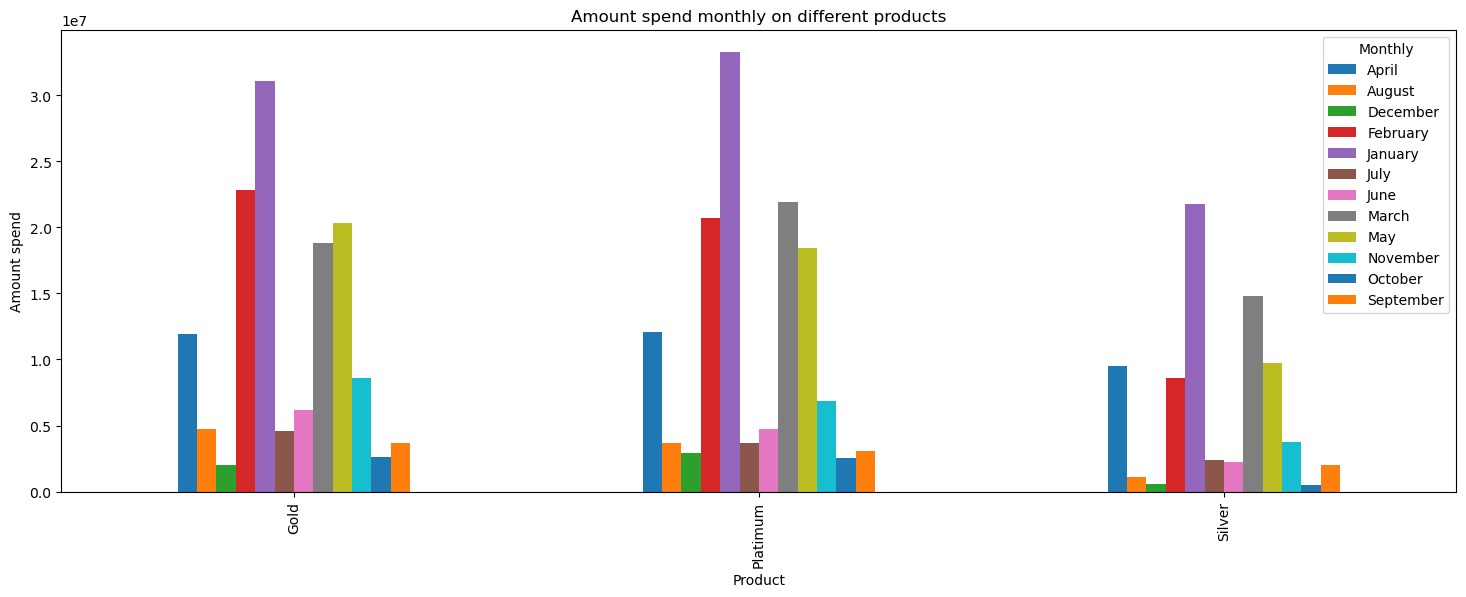

In [212]:
product_comp.plot(kind = 'bar', figsize = (18,6), width = 0.5)
plt.ylabel('Amount spend')
plt.title('Amount spend monthly on different products');

#### Sales were higher in:
- January
- Feburary
- March
- April
- May